## Unsupervised Learning

### Clustering

In [10]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
iris = pd.read_csv('data/iris.csv')
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
X = iris.copy()
y = X.pop('species')

In [4]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [5]:
from sklearn.cluster import KMeans

In [6]:
km = KMeans(3)

In [7]:
ypred = km.fit_predict(X)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [11]:
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [15]:
(y.map(dict(setosa=0, versicolor=1, virginica=2))==ypred).sum() / len(ypred)

0.8933333333333333

In [16]:
from sklearn.datasets import load_digits

In [17]:
digits = load_digits()

In [18]:
digits.data

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [19]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [20]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [21]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [26]:
comp = pd.DataFrame(dict(ypred=ypred, yorig=y))
comp

,ypred,yorig
0,0,setosa
1,0,setosa
2,0,setosa
3,0,setosa
4,0,setosa
...,...,...
145,2,virginica
146,1,virginica
147,2,virginica
148,2,virginica


In [31]:
comp.groupby('ypred').yorig.size()

ypred
0    50
1    62
2    38
Name: yorig, dtype: int64

In [23]:
from sklearn.datasets import load_digits

In [25]:
digits = load_digits()

In [30]:
y.mode()

0        setosa
1    versicolor
2     virginica
Name: species, dtype: object

In [39]:
ycorr = y.copy()

In [41]:
for i in range(3):
    mask = ypred==i
    # cat = y[mask].mode()[0]
    cat = mode(y[mask]).mode
    ycorr[mask] = cat

In [42]:
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

In [43]:
ycorr

0          setosa
1          setosa
2          setosa
3          setosa
4          setosa
          ...    
145     virginica
146    versicolor
147     virginica
148     virginica
149    versicolor
Name: species, Length: 150, dtype: object

In [44]:
(ycorr==y).sum() / len(y)

0.8933333333333333

In [46]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [48]:
print(digits['DESCR'])

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [52]:
digits['data']
digits.data.shape

(1797, 64)

In [56]:
len(digits.data[0])
digits.data[1001].reshape((8,8))

array([[ 0.,  0.,  0.,  1., 15.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  5., 15.,  0.,  4.,  0.],
       [ 0.,  0.,  0., 13.,  8.,  1., 16.,  3.],
       [ 0.,  0.,  5., 15.,  2.,  5., 15.,  0.],
       [ 0.,  5., 15., 16., 16., 16.,  8.,  0.],
       [ 0., 14., 12., 12., 14., 16.,  2.,  0.],
       [ 0.,  0.,  0.,  0., 12., 12.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 16.,  5.,  0.,  0.]])

In [57]:
import matplotlib.pyplot as plt

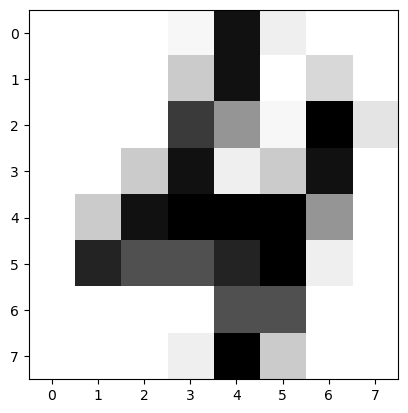

In [66]:
plt.imshow(digits.data[1001].reshape((8,8)), cmap='Grays')

In [67]:
digits.target[1001]

4

In [68]:
from scipy.stats import mode

In [71]:
m = mode(np.array([1,1,1,2,3]))

In [72]:
m.mode

1

In [73]:
X = digits.data
X

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [74]:
y = digits.target
y

array([0, 1, 2, ..., 8, 9, 8])

In [75]:
km = KMeans(n_clusters=10)

In [79]:
ypred = km.fit_predict(X)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [80]:
ycorr = y.copy()

for i in range(10):
    mask = ypred==i
    cat = mode(y[mask]).mode
    ycorr[mask] = cat

In [81]:
ycorr

array([0, 8, 8, ..., 8, 9, 9])

In [83]:
pd.DataFrame(dict(ycorr=ycorr, ypred=ypred, y=y))

,ycorr,ypred,y
0,0,9,0
1,8,2,1
2,8,2,2
3,3,1,3
4,4,7,4
...,...,...,...
1792,9,4,9
1793,0,9,0
1794,8,2,8
1795,9,4,9


In [84]:
from sklearn.metrics import classification_report, confusion_matrix

In [85]:
confusion_matrix(y, ycorr)

array([[177,   0,   0,   0,   1,   0,   0,   0,   0,   0],
       [  0,  55,  24,   1,   0,   1,   2,   0,  99,   0],
       [  1,   2, 148,  13,   0,   0,   0,   3,   8,   2],
       [  0,   0,   0, 154,   0,   2,   0,   7,   7,  13],
       [  0,   5,   0,   0, 164,   0,   0,   8,   4,   0],
       [  0,   0,   0,   1,   2, 136,   1,   0,   0,  42],
       [  1,   1,   0,   0,   0,   0, 177,   0,   2,   0],
       [  0,   0,   0,   0,   0,   0,   0, 175,   4,   0],
       [  0,   5,   3,   2,   0,   5,   2,   3, 103,  51],
       [  0,  20,   0,   6,   0,   6,   0,   7,   2, 139]])

### Dimensionality Reduction

In [86]:
from sklearn.decomposition import PCA

In [101]:
pca = PCA(2)

In [106]:
Xtrans = pca.fit_transform(X)
yred = Xtrans

In [103]:
X.shape

(1797, 64)

In [104]:
pca.explained_variance_ratio_.cumsum()

array([0.14890594, 0.28509365])

In [105]:
pca.explained_variance_ratio_.sum()

0.28509364823698796

<Axes: >

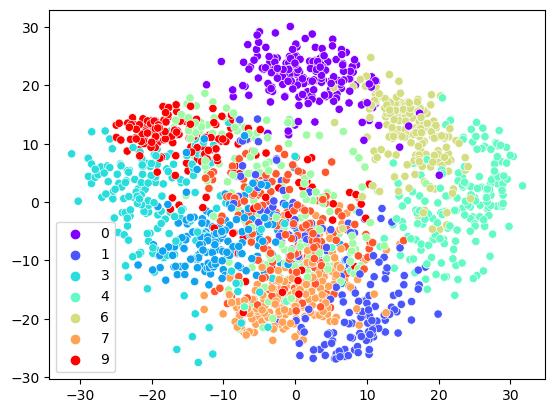

In [111]:
sns.scatterplot(x=yred[:,0], y=yred[:,1], hue=y, palette='rainbow')

<Axes: >

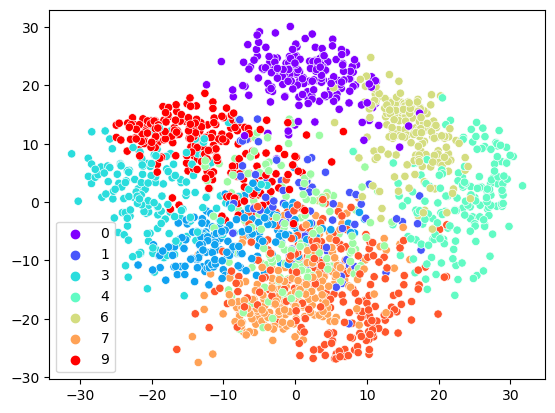

In [113]:
sns.scatterplot(x=yred[:,0], y=yred[:,1], hue=ycorr, palette='rainbow')

In [114]:
from statsmodels.regression.linear_model import OLS